# Examples of settings for PinT experiments

## Problem A : snails in complex plane

$$
\frac{du}{dt} = iu, \quad u_0 = 1, \quad t \in [0, 2\pi-0.1], \quad N=4.
$$

In [1]:
import numpy as np
from blockops import BlockProblem
from blockops.plots import plotIterations2D

tEnd = 2*np.pi-0.2
lam = 1j
nBlocks = 4

### Experiment 0 : basic Parareal using interface formulation

- Fine operator : 1 points per blocks, 10 BE time-steps per point
- Approximate operator : 1 points per blocks, 1 BE time-step per point

max discretization error : 0.3688475160376599
iter 0, max PinT error : 0.7270822548475186
iter 1, max PinT error : 0.6067350737820781
iter 2, max PinT error : 0.30218725409625985
iter 3, max PinT error : 0.060981866799267696


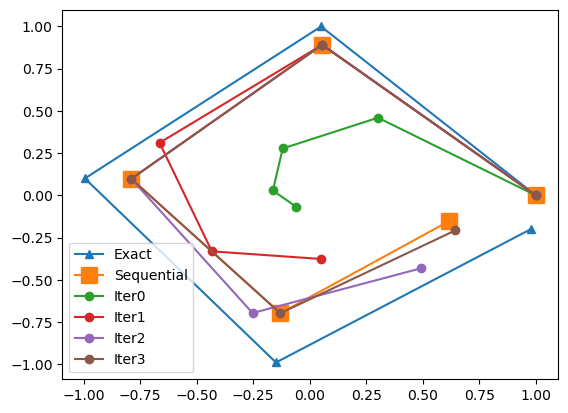

In [2]:
prob = BlockProblem(lam, tEnd, nBlocks, nPoints=1, scheme='RungeKutta', rkScheme='BE', nStepsPerPoint=10)
prob.setApprox('RungeKutta', rkScheme='BE', nStepsPerPoint=1)

plotIterations2D(prob, 'Parareal')

### Experiment 1 : Parareal using TMG formulation

- Fine operator : 10 points per blocks, 1 BE time-steps per point
- Approximate operator : 1 points per blocks, 1 BE time-step per point

:bell: Note : this produces an equivalent solution as for Experiment 0 on the block interfaces

max discretization error : 0.4000024872915592
iter 0, max PinT error : 0.8355492216845178
iter 1, max PinT error : 0.5752587499692029
iter 2, max PinT error : 0.33233082535928665
iter 3, max PinT error : 0.09621000112000967


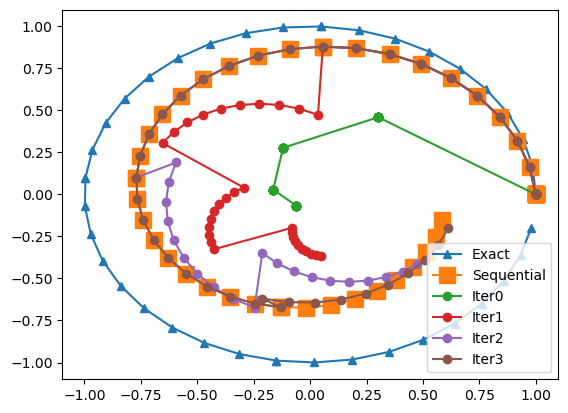

In [3]:
prob = BlockProblem(lam, tEnd, nBlocks, nPoints=10, scheme='RungeKutta', rkScheme='BE', nStepsPerPoint=1)
prob.setCoarseLevel(1)

plotIterations2D(prob, 'TMG')

### Experiment 2 : Two-level PFASST

- Fine operator : 5 LOBATTO points per blocks, one Collocation step
- Approximate operator : 5 points per blocks, 1 BE time-step per point
- Coarse level : 2 points per blocks

max discretization error : 3.9694520224584015e-05
iter 0, max PinT error : 0.8538658052446111
iter 1, max PinT error : 0.13636820378822237
iter 2, max PinT error : 0.04458571053547193
iter 3, max PinT error : 0.010304553929737116


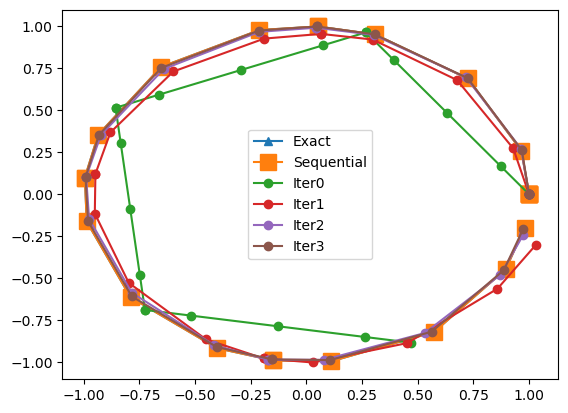

In [4]:
prob = BlockProblem(lam, tEnd, nBlocks, nPoints=5, scheme='Collocation')
prob.setApprox('RungeKutta', rkScheme='BE')
prob.setCoarseLevel(2)

plotIterations2D(prob, 'PFASST')